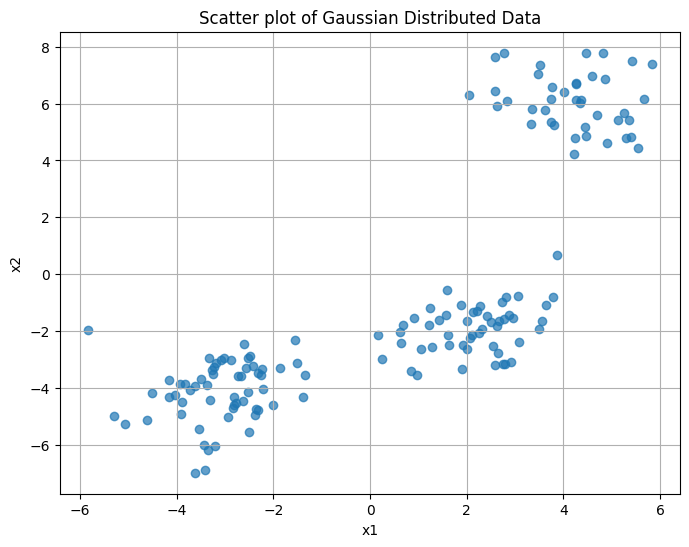

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(42)

### Question 1: Generating Gaussian Distributed Data ###

# Define mean vectors and covariance matrices
mu1, sigma1 = np.array([2, -2]), np.array([[1, 0.5], [0.5, 1]])
mu2, sigma2 = np.array([4, 6]), np.array([[1, -0.3], [-0.3, 1]])
mu3, sigma3 = np.array([-3, -4]), np.array([[1, 0.2], [0.2, 1]])

# Generate Gaussian distributed data
D1 = np.random.multivariate_normal(mu1, sigma1, 50)
D2 = np.random.multivariate_normal(mu2, sigma2, 40)
D3 = np.random.multivariate_normal(mu3, sigma3, 60)

# Create dataset and shuffle
X = np.vstack((D1, D2, D3))
np.random.shuffle(X)

# Scatter plot of data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Scatter plot of Gaussian Distributed Data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

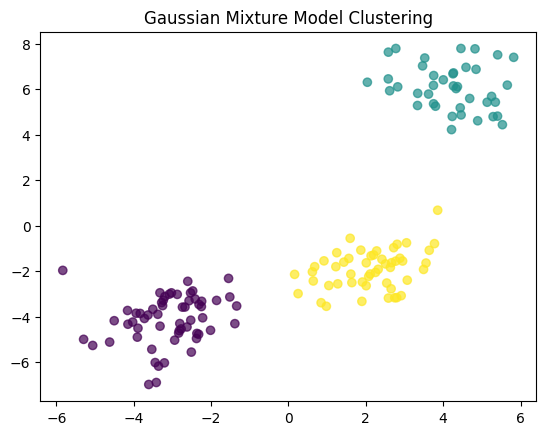

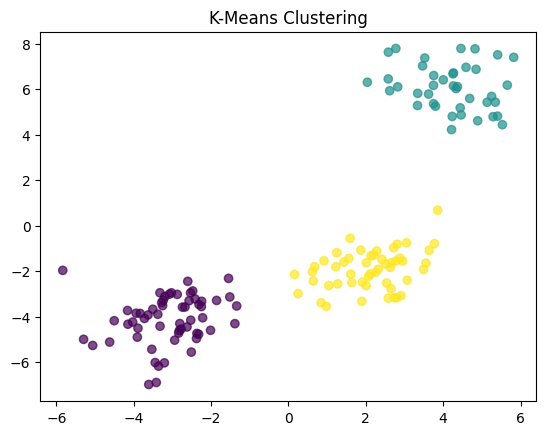

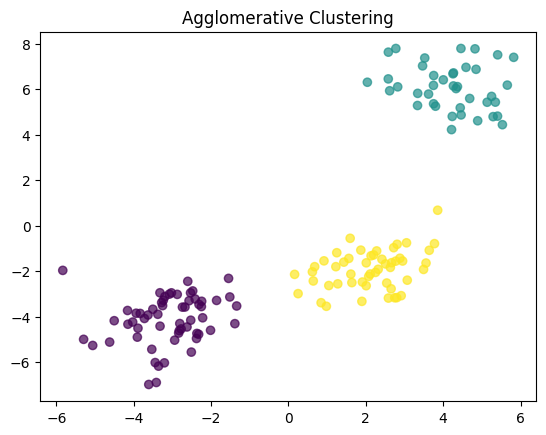

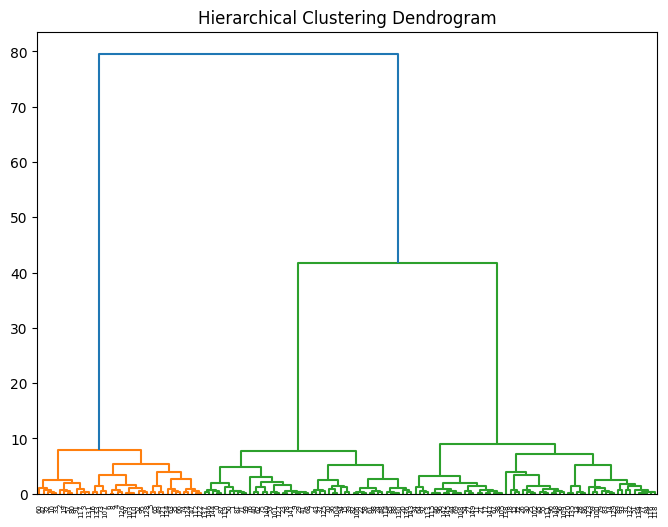

In [4]:
### Question 2: Implementing Clustering Algorithms ###

# Clustering Algorithms
# 1. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.show()

# 2. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")
plt.show()

# 3. Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.7)
plt.title("Agglomerative Clustering")
plt.show()

# Dendrogram
plt.figure(figsize=(8, 6))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

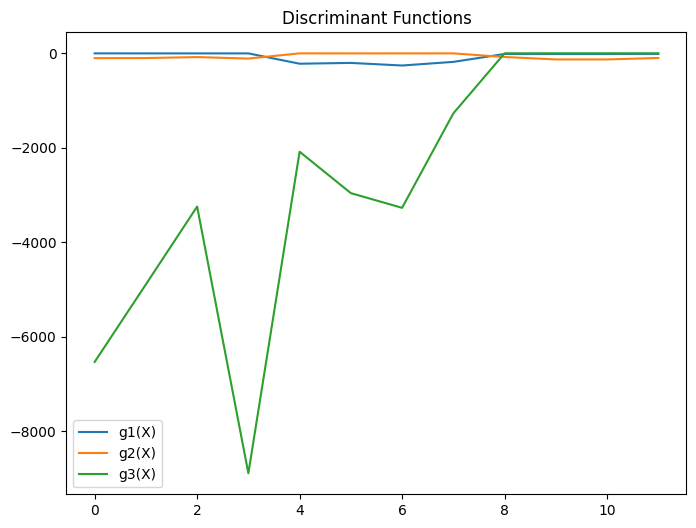

In [5]:
### Question 3: Discriminant Function and Multivariate Normal Distribution ###

# Given dataset for Discriminant Function
X_data = np.array([
    [2.1, -2.5], [1.1, -3.1], [1.4, -2.1], [3.3, -1.8],
    [4.4, 6.5], [3.4, 5.8], [4.5, 7.2], [4.1, 5.65],
    [-1.3, -2.3], [-3.2, -4.5], [-3.2, -4.5], [-2.1, -3.3]
])
labels = np.array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

# Compute mean vectors
mu1 = np.mean(X_data[labels == 1], axis=0)
mu2 = np.mean(X_data[labels == 2], axis=0)
mu3 = np.mean(X_data[labels == 3], axis=0)

# Compute covariance matrices
sigma1 = np.cov(X_data[labels == 1].T)
sigma2 = np.cov(X_data[labels == 2].T)
sigma3 = np.cov(X_data[labels == 3].T)

# Define prior probabilities
P_w1, P_w2, P_w3 = 0.4, 0.35, 0.25

# Discriminant functions
def discriminant_function(x, mu, sigma, prior):
    return np.log(prior) - 0.5 * np.log(np.linalg.det(sigma)) - 0.5 * (x - mu) @ np.linalg.inv(sigma) @ (x - mu).T

g1 = np.array([discriminant_function(x, mu1, sigma1, P_w1) for x in X_data])
g2 = np.array([discriminant_function(x, mu2, sigma2, P_w2) for x in X_data])
g3 = np.array([discriminant_function(x, mu3, sigma3, P_w3) for x in X_data])

# Plot Discriminant Functions
plt.figure(figsize=(8, 6))
plt.plot(g1, label='g1(X)')
plt.plot(g2, label='g2(X)')
plt.plot(g3, label='g3(X)')
plt.legend()
plt.title("Discriminant Functions")
plt.show()